<a href="https://colab.research.google.com/github/SebastianMM-96/fake-news/blob/main/fakeNewsModels/NLP/nlp-fake-news-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Classifier | NLP & Supervised Learning
#### Developed by: Sebastián Marroquín

### 1. Importando las librerias necesarias

In [1]:
# Librerias basicas
import pandas as pd
import numpy as np
import itertools
import pickle

# Librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Modelos que utilizaremos
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB

### 2. Cargando el conjunto de datos

In [2]:
# Cargar el conjunto de datos dentro de un dataframe
data = pd.read_csv('/content/drive/MyDrive/fake-news-datasets/Datacamp/fake_or_real_news.csv')

#### 2.1 Inspección del conjunto de datos

In [3]:
data.sample(10)

,Unnamed: 0,title,text,label
6114,6741,Clinton Staffer Caught Sacrificing Baby to Dem...,"\r\nAccording to a new Wikileaks email leak , ...",FAKE
1954,4544,Loretta Lynch becomes first African-American w...,Washington (CNN) Loretta Lynch was sworn in as...,REAL
3854,6844,Behind Hillary’s DISGUSTING Plot To Sabotage B...,We all know by now that the Clinton campaign w...,FAKE
5382,3172,The Libertarian Moment Is So Over That Liberta...,"Yeah, yeah, with the rise of Der Trumper and t...",REAL
987,1556,Why the Ted Cruz-Marco Rubio debate mattered m...,"Ted Cruz and Marco Rubio, both rising in the p...",REAL
2773,3781,The feds probably won't dismantle the Ferguson...,Attorney General Eric Holder said Friday he wa...,REAL
5932,2494,"Sanders, Clinton talk immigration, battle for ...",Democratic presidential candidates Hillary Cli...,REAL
3413,9955,Putin Warns “US Has Pushed Russia Back Into Nu...,( ZHE ) Having unveiled the first images of it...,FAKE
884,5502,Russian pianist Denis Matsuev terrorized in US...,Russian pianist Denis Matsuev terrorized in US...,FAKE
775,5083,"Hillary Clinton Promises Steady Leadership, Mo...",Twenty four years ago Hillary Clinton walked o...,REAL


Verificaremos la integridad de los datos, esto si es que dentro del conjunto de datos existen valores que puedan estar perdidos ó que sean nulos

In [4]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


De lo anterior sabemos que los datos se encuentran en buen estado, por lo que podemos continuar.

### 3. Trabajando con los datos
A continuación vamos a separar las etiquetas del conjunto de datos y lo asignaremos dentro de una variable, ademas prepararemos nuestros conjuntos de **entrenamiento** y de **pruebas**.

In [6]:
# Guardamos dentro de labels las etiquetas del conjunto de datos
labels = data.label

In [7]:
labels.sample(10)

2310    FAKE
235     FAKE
869     REAL
158     REAL
5295    REAL
202     REAL
6122    FAKE
105     REAL
1725    FAKE
4515    FAKE
Name: label, dtype: object

In [8]:
# Eliminaremos del conjunto de datos la columna 'label'
data.drop('label', axis=1)

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene..."


#### 3.1 Preparando los conjuntos: Entrenamiento | Prueba

In [9]:
# Dividiremos nuestro conjunto de datos a un 33% 
X_train, X_test, y_train, y_test = train_test_split(data['text'], 
                                                    labels, test_size=0.33, 
                                                    random_state=53)

### 4. Extracción de características (o vectorización)

Para utilizar los datos textuales dentro de un modelo de predicción, debemos de analizar el texto para eliminar ciertas palabras, a este proceso se le conoce como **tokenización**. Las palabras pueden codificarse como valores de tipo entero ó de punto flotante para ser utilizadas como entradas en nuestro modelo de predicción. Analizaremos dos de estas técnicas a continuación. 

#### 4.1 Count Vectorizer

Este algoritmo se utiliza para convertir una colección de documentos de texto en un vector de *tokens*. El algoritmo es útil cuando cuando tenemos varios textos de este tipo y deseamos convertir cada palabra de cada texto en vectores. 

#### 4.2 Tf-idf
Tf-idf es una abreviación para *Term Frequency - Inverse Document Frequency*.

Este algoritmo nos permite determinar las palabaras más importantes de un documento, en este caso el texto de la noticia que contiene nuestro conjunto de datos. Estas palabras deben ponderarse negativamente en importancia.

##### 4.2.1 Formula del Tf-idf

$$w_{i,j}= tf_{i,j} * log(\frac{N}{df_{i}})$$

Donde:

*   $w_{i,j}$: peso del token $i$ del Tf-idf en el documento $j$ 
*   $tf_{i,j}$: número de occurrencias del token $i$ dentro del documento $j$
*   $df_{i}$: número de documentos que contienen el token $i$
*   $N$: número total de documentos

In [10]:
# Inicializaremos el CountVectorizer
countVec = CountVectorizer(stop_words='english')

# Ajustaremos el algoritmo al conjunto de entrenamiento
countTrain = countVec.fit_transform(X_train)

# Transformaremos el conjunto de prueba a nuestro algoritmo
countTest = countVec.transform(X_test)

In [11]:
  # Inicializaremos el Tf-idf a un 70% del conjunto de datos
tfidfVec = TfidfVectorizer(stop_words='english', max_df=0.7)

# Ajustaremos el algoritmo a nuestro conjunto de entrenamiento
tfidfVec.fit_transform(X_train)

# Transformaremos el conjunto de prueba a nuestro algoritmo 
tfidfTest = tfidfVec.transform(X_test)

#### 4.3 Información obtenida de los algoritmos

In [12]:
print("Tf-idf: {}".format(tfidfVec.get_feature_names()[-10:]))

Tf-idf: ['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [13]:
print("CountVectorizer: {}".format(countVec.get_feature_names()[-10:]))

CountVectorizer: ['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [14]:
countDF = pd.DataFrame(countTrain.A, columns=countVec.get_feature_names())
tfidfDF = pd.DataFrame(countTrain.A, columns=countVec.get_feature_names())

diff = set(countDF.columns) - set(tfidfDF.columns)

print(diff)

set()


In [15]:
# Verificaremos si los dataframes son iguales
print(countDF.equals(tfidfDF))

True


In [16]:
countDF.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,001,0011,002,003,004,006,006s,007,007s,008,008s,009,0099,00am,00p,00pm,01,010,013,014,015,016,018,01am,02,020,022,023,024,025,...,שולטים,שזו,שטחים,שינוי,שיתעקש,שכל,שכמוני,של,שלו,שנדרש,שני,שעת,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,أن,إجلاء,الأمر,الجرحى,الدولية,القادمون,اللجنة,تحتاج,تعرفه,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
tfidfDF.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,001,0011,002,003,004,006,006s,007,007s,008,008s,009,0099,00am,00p,00pm,01,010,013,014,015,016,018,01am,02,020,022,023,024,025,...,שולטים,שזו,שטחים,שינוי,שיתעקש,שכל,שכמוני,של,שלו,שנדרש,שני,שעת,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,أن,إجلاء,الأمر,الجرحى,الدولية,القادمون,اللجنة,تحتاج,تعرفه,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 5. Modelo
El modelo que utilizaremos para predecir será: **Naïve Bayes**.
Para esto, nos apoyaremos en una función pre-construida por Scikit-Learn, la cual nos ayudará a graficar las matrices de confusión que obtengamos de nuestros modelos

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### 5.1 Naïve Bayes & Tf-idf

Ahora definiremos una "*linea de ensamblaje*", la cual contendra la inicialización del clasificador, así como el modelo que contruimos de Tf-idf

In [19]:
nbPipe = Pipeline([
                   ('nbTfidf', tfidfVec),
                   ('nbClf', MultinomialNB())
])

Ajustaremos el clasificador al conjunto de entrenamiento que generamos, como se muestra a continuación

In [20]:
nbPipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('nbTfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nbClf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Realizaremos la predicción para el conjunto de pruebas

In [21]:
predictedNbPipe = nbPipe.predict(X_test)

Calcularemos algunas de las metricas que tenemos disponibles, estas son las siguientes:



*   Efectividad
*   Reporte de clasificación
*   Matriz de confusión



In [22]:
score = accuracy_score(y_test, predictedNbPipe)
print("Accuracy: {}%".format(round(score*100, 2)))

Accuracy: 85.65%


In [23]:
print(classification_report(y_test, predictedNbPipe))

              precision    recall  f1-score   support

        FAKE       0.96      0.73      0.83      1008
        REAL       0.80      0.97      0.88      1083

    accuracy                           0.86      2091
   macro avg       0.88      0.85      0.85      2091
weighted avg       0.88      0.86      0.85      2091



Confusion matrix, without normalization


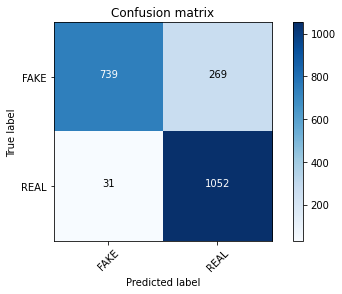

In [24]:
# Calculo de la matriz de confusion
confMatrix = confusion_matrix(y_test, predictedNbPipe, labels=['FAKE', 'REAL'])
# Graficar la matriz de confusion
plot_confusion_matrix(confMatrix, classes=['FAKE', 'REAL'])

#### 5.2 Naïve Bayes & CountVectorizer

Ahora nuestra "*línea de ensamblaje*" tendrá el modelo que construimos de CountVectorizer, por lo que realizaremos los mismos pasos que hicimos para el clasificador de Tf-idf.

In [25]:
nbPipe_ = Pipeline([
                    ('nbCountVec', countVec),
                    ('nbClf', MultinomialNB())
])

In [26]:
nbPipe_.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('nbCountVec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nbClf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [27]:
predictedNbPipe_ = nbPipe_.predict(X_test)

In [28]:
score = accuracy_score(y_test, predictedNbPipe_)
print("Accuracy: {}%".format(round(score*100, 2)))

Accuracy: 89.34%


In [29]:
print(classification_report(y_test, predictedNbPipe_))

              precision    recall  f1-score   support

        FAKE       0.92      0.86      0.89      1008
        REAL       0.88      0.93      0.90      1083

    accuracy                           0.89      2091
   macro avg       0.90      0.89      0.89      2091
weighted avg       0.89      0.89      0.89      2091



Confusion matrix, without normalization


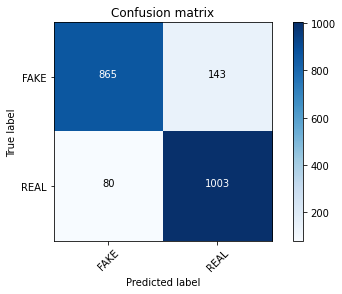

In [30]:
# Calculo de la matriz de confusion
confMatrix_ = confusion_matrix(y_test, predictedNbPipe_, labels=['FAKE', 'REAL'])
# Graficar la matriz de confusion
plot_confusion_matrix(confMatrix_, classes=['FAKE', 'REAL'])

#### 5.3 Passive Agressive

In [31]:
paPipe = Pipeline([
                   ('linearModel', tfidfVec),
                   ('paClf', PassiveAggressiveClassifier(max_iter=50))
])

In [32]:
paPipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('linearModel',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 toke...ern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('paClf',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
      

In [33]:
predictedPA = paPipe.predict(X_test)

In [34]:
score = accuracy_score(y_test, predictedPA)
print("Accuracy: {}%".format(round(score*100, 2)))

Accuracy: 93.21%


In [35]:
print(classification_report(y_test, predictedPA))

              precision    recall  f1-score   support

        FAKE       0.92      0.94      0.93      1008
        REAL       0.95      0.92      0.93      1083

    accuracy                           0.93      2091
   macro avg       0.93      0.93      0.93      2091
weighted avg       0.93      0.93      0.93      2091



Confusion matrix, without normalization


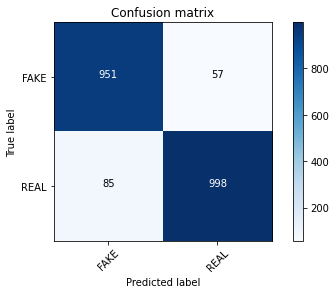

In [36]:
# Calculo de la matriz de confusion
cmPA = confusion_matrix(y_test, predictedPA, labels=['FAKE', 'REAL'])
# Graficar la matriz de confusion
plot_confusion_matrix(cmPA, classes=['FAKE', 'REAL'])

### 6. Importando el modelo

In [37]:
pickle_out = open("/content/drive/MyDrive/models/passiveAgressiveModel.sav","wb")
pickle.dump(paPipe, pickle_out)
pickle_out.close()